# New Orleans Crime Stats for 2018
---
## Starter Code to Import Libraries and Load Crime Statistics

The dataset is for all of the Police Reports filed by NOPD officers including incident and supplemental reports containing the item number, location, disposition, signal, charges, offender race, offender gender, offender age, victim age, victim gender, and victim race for the year 2018.


In [267]:
# Dependencies and Setup
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [268]:
# Load the csv into a Pandas Data Frame
crime_2018 = pd.read_csv("Resources/police2018.csv")

# Examine the data frame
crime_2018.head()


,Item_Number,Year,District,Location,Disposition,Signal_Type,Signal_Description,Occurred_Date_Time,Charge_Code,Charge_Description,...,Offender_Age,Offender_Number,Person_Type,Victim_Race,Victim_Gender,Victim_Age,Victim_Number,Victim_Fatal_Status,Hate_Crime,Report_Type
0,D-23482-18,2018,6,23XX Milan St,CLOSED,67,THEFT,4/20/18 7:32,54 186,THEFT,...,42.0,1.0,VICTIM,BLACK,FEMALE,39.0,1.0,Non-fatal,NaN,Supplemental Report
1,E-13975-18,2018,4,45XX Macarthur Bd 69,OPEN,27-29S,ATTEMPTED SUICIDE,5/11/18 16:19,NaN,NaN,...,NaN,NaN,VICTIM,BLACK,MALE,38.0,1.0,Non-fatal,NaN,Incident Report
2,D-34501-18,2018,3,63XX Elysian Fields St,CLOSED,37,AGGRAVATED ASSAULT,4/28/18 23:50,40 966,PROHIBITED ACTS--SCHEDULE I DRUGS,...,19.0,1.0,VICTIM,NaN,NaN,NaN,1.0,Non-fatal,NaN,Incident Report
3,E-12091-18,2018,8,15XX Pauger St,OPEN,67,THEFT,5/10/18 3:30,14 67,THEFT,...,NaN,1.0,VICTIM,BLACK,MALE,61.0,1.0,Non-fatal,NaN,Incident Report
4,I-29004-18,2018,5,9XX Mandeville St,OPEN,21,MISCELLANEOUS INCIDENT,9/23/18 11:30,NaN,NaN,...,NaN,NaN,REPORTING PERSON,BLACK,FEMALE,30.0,1.0,Non-fatal,NaN,Incident Report


In [269]:
# Examine the data types within the dataset
crime_2018.dtypes

Item_Number             object
Year                     int64
District                 int64
Location                object
Disposition             object
Signal_Type             object
Signal_Description      object
Occurred_Date_Time      object
Charge_Code             object
Charge_Description      object
Offender_Race           object
Offender_Gender         object
Offender_Age           float64
Offender_Number        float64
Person_Type             object
Victim_Race             object
Victim_Gender           object
Victim_Age             float64
Victim_Number          float64
Victim_Fatal_Status     object
Hate_Crime              object
Report_Type             object
dtype: object

In [270]:
len(crime_2018.index)

122529

In [271]:
# Convert Occurred_Date_Time from integer to date time.
crime_2018['Occurred_Date_Time'] = pd.to_datetime(crime_2018['Occurred_Date_Time'], utc=True)
crime_2018['Occurred_Date_Time'].dt.date

0         2018-04-20
1         2018-05-11
2         2018-04-28
3         2018-05-10
4         2018-09-23
             ...    
122524    2018-12-26
122525    2018-12-22
122526    2018-12-21
122527    2018-12-25
122528    2018-12-20
Name: Occurred_Date_Time, Length: 122529, dtype: object

In [272]:
# This code replaces the date/time in Occurred_Date_Time column with only the date.
crime_2018["Occurred_Date_Time"] = crime_2018["Occurred_Date_Time"].dt.date
print(crime_2018)

       Item_Number  Year  District                   Location Disposition  \
0       D-23482-18  2018         6              23XX Milan St      CLOSED   
1       E-13975-18  2018         4       45XX Macarthur Bd 69        OPEN   
2       D-34501-18  2018         3     63XX Elysian Fields St      CLOSED   
3       E-12091-18  2018         8             15XX Pauger St        OPEN   
4       I-29004-18  2018         5          9XX Mandeville St        OPEN   
...            ...   ...       ...                        ...         ...   
122524  L-32803-18  2018         5            14XX Jourdan Av        OPEN   
122525  L-28470-18  2018         2             81XX Nelson St        OPEN   
122526  L-27594-18  2018         6         28XX S Derbigny St        OPEN   
122527  L-31983-18  2018         1  14XX Henriette Delille St        OPEN   
122528  L-26044-18  2018         2       13XX S Carrollton Av        OPEN   

       Signal_Type           Signal_Description Occurred_Date_Time  \
0    

In [273]:
# This views the data and conducts column counts.
crime_2018.count()

Item_Number            122529
Year                   122529
District               122529
Location               122529
Disposition            122529
Signal_Type            122529
Signal_Description     122529
Occurred_Date_Time     122529
Charge_Code             57202
Charge_Description      57202
Offender_Race           59007
Offender_Gender         56303
Offender_Age            39457
Offender_Number         77688
Person_Type            118447
Victim_Race             91231
Victim_Gender           91519
Victim_Age              85198
Victim_Number          118447
Victim_Fatal_Status    122529
Hate_Crime                 43
Report_Type            122529
dtype: int64

In [274]:
# Drop the duplicates and keep the first value, use inplace True
deduped_crime = crime_2018.drop_duplicates(subset=["Item_Number"], keep="first", inplace=False)
#deduped_crime = crime_2018
deduped_crime

,Item_Number,Year,District,Location,Disposition,Signal_Type,Signal_Description,Occurred_Date_Time,Charge_Code,Charge_Description,...,Offender_Age,Offender_Number,Person_Type,Victim_Race,Victim_Gender,Victim_Age,Victim_Number,Victim_Fatal_Status,Hate_Crime,Report_Type
0,D-23482-18,2018,6,23XX Milan St,CLOSED,67,THEFT,2018-04-20,54 186,THEFT,...,42.0,1.0,VICTIM,BLACK,FEMALE,39.0,1.0,Non-fatal,NaN,Supplemental Report
1,E-13975-18,2018,4,45XX Macarthur Bd 69,OPEN,27-29S,ATTEMPTED SUICIDE,2018-05-11,NaN,NaN,...,NaN,NaN,VICTIM,BLACK,MALE,38.0,1.0,Non-fatal,NaN,Incident Report
2,D-34501-18,2018,3,63XX Elysian Fields St,CLOSED,37,AGGRAVATED ASSAULT,2018-04-28,40 966,PROHIBITED ACTS--SCHEDULE I DRUGS,...,19.0,1.0,VICTIM,NaN,NaN,NaN,1.0,Non-fatal,NaN,Incident Report
3,E-12091-18,2018,8,15XX Pauger St,OPEN,67,THEFT,2018-05-10,14 67,THEFT,...,NaN,1.0,VICTIM,BLACK,MALE,61.0,1.0,Non-fatal,NaN,Incident Report
4,I-29004-18,2018,5,9XX Mandeville St,OPEN,21,MISCELLANEOUS INCIDENT,2018-09-23,NaN,NaN,...,NaN,NaN,REPORTING PERSON,BLACK,FEMALE,30.0,1.0,Non-fatal,NaN,Incident Report
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122519,L-26122-18,2018,2,87XX Green St,CLOSED,17F,FUGITIVE ATTACHMENT,2018-12-20,FUGITIVE ATTACHMENT,WARRANT ISSUED BY,...,26.0,1.0,VICTIM,NaN,NaN,NaN,1.0,Non-fatal,NaN,Incident Report
122522,L-32577-18,2018,2,88XX Nelson St,OPEN,103D,DISTURBANCE (DOMESTIC),2018-12-25,NaN,NaN,...,NaN,NaN,REPORTING PERSON,WHITE,FEMALE,24.0,1.0,Non-fatal,NaN,Incident Report
122523,L-28431-18,2018,5,20XX Alabo St,OPEN,21P,LOST PROPERTY,2018-12-22,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non-fatal,NaN,Supplemental Report
122525,L-28470-18,2018,2,81XX Nelson St,OPEN,62C,SIMPLE BURGLARY (VEHICLE),2018-12-22,14 62,SIMPLE BURGLARY,...,NaN,1.0,VICTIM,WHITE,MALE,30.0,1.0,Non-fatal,NaN,Incident Report


In [275]:
# This drops duplicates from Item_Number, then stores the changes.
#crime_2018.drop_duplicates(keep=False, ignore_index=True, inplace=True)
#deduped_crime = crime_2018
deduped_crime.count()

Item_Number            72050
Year                   72050
District               72050
Location               72050
Disposition            72050
Signal_Type            72050
Signal_Description     72050
Occurred_Date_Time     72050
Charge_Code            35541
Charge_Description     35541
Offender_Race          30759
Offender_Gender        28913
Offender_Age           22066
Offender_Number        43305
Person_Type            67987
Victim_Race            51290
Victim_Gender          51466
Victim_Age             48100
Victim_Number          67987
Victim_Fatal_Status    72050
Hate_Crime                16
Report_Type            72050
dtype: int64

In [276]:
# Remove Miscellaneous Incident from the Signal_Description column
clean_signal =deduped_crime.loc[~deduped_crime["Signal_Description"].str.contains("MISCELLANEOUS INCIDENT")]
clean_signal.head()

,Item_Number,Year,District,Location,Disposition,Signal_Type,Signal_Description,Occurred_Date_Time,Charge_Code,Charge_Description,...,Offender_Age,Offender_Number,Person_Type,Victim_Race,Victim_Gender,Victim_Age,Victim_Number,Victim_Fatal_Status,Hate_Crime,Report_Type
0,D-23482-18,2018,6,23XX Milan St,CLOSED,67,THEFT,2018-04-20,54 186,THEFT,...,42.0,1.0,VICTIM,BLACK,FEMALE,39.0,1.0,Non-fatal,NaN,Supplemental Report
1,E-13975-18,2018,4,45XX Macarthur Bd 69,OPEN,27-29S,ATTEMPTED SUICIDE,2018-05-11,NaN,NaN,...,NaN,NaN,VICTIM,BLACK,MALE,38.0,1.0,Non-fatal,NaN,Incident Report
2,D-34501-18,2018,3,63XX Elysian Fields St,CLOSED,37,AGGRAVATED ASSAULT,2018-04-28,40 966,PROHIBITED ACTS--SCHEDULE I DRUGS,...,19.0,1.0,VICTIM,NaN,NaN,NaN,1.0,Non-fatal,NaN,Incident Report
3,E-12091-18,2018,8,15XX Pauger St,OPEN,67,THEFT,2018-05-10,14 67,THEFT,...,NaN,1.0,VICTIM,BLACK,MALE,61.0,1.0,Non-fatal,NaN,Incident Report
5,D-13290-18,2018,5,19XX N Tonti St,CLOSED,966,DRUG LAW VIOLATION,2018-04-11,14 95.1,POSSESSION OF FIREARM BY FELON,...,31.0,1.0,VICTIM,NaN,NaN,NaN,1.0,Non-fatal,NaN,Incident Report


In [277]:
# Select columns of interest from the DataFrame and save the new DataFrame
# Selected: "Item_Number", "Year", "District", "Signal_Description", "Occurred_Date_Time", & "Offender_Gender". 

reduced_crime_df = clean_signal[["Item_Number", "Year", "District", "Signal_Type","Signal_Description", "Occurred_Date_Time", 
                       "Offender_Gender", "Victim_Fatal_Status"]]
reduced_crime_df.head()

,Item_Number,Year,District,Signal_Type,Signal_Description,Occurred_Date_Time,Offender_Gender,Victim_Fatal_Status
0,D-23482-18,2018,6,67,THEFT,2018-04-20,MALE,Non-fatal
1,E-13975-18,2018,4,27-29S,ATTEMPTED SUICIDE,2018-05-11,NaN,Non-fatal
2,D-34501-18,2018,3,37,AGGRAVATED ASSAULT,2018-04-28,MALE,Non-fatal
3,E-12091-18,2018,8,67,THEFT,2018-05-10,MALE,Non-fatal
5,D-13290-18,2018,5,966,DRUG LAW VIOLATION,2018-04-11,MALE,Non-fatal


In [278]:
# Count how many incidents occurred
crime_type = reduced_crime_df ["Signal_Description"].value_counts()
crime_type

DISTURBANCE (DOMESTIC)             10552
DRUG LAW VIOLATION                  4244
SIMPLE BURGLARY (VEHICLE)           3983
FUGITIVE ATTACHMENT                 3765
SIMPLE BATTERY (DOMESTIC)           3693
                                   ...  
UNDERAGE DRINKING                      1
PUBLIC DRUNK                           1
LOST OR STOLEN                         1
ATTEMPTED AGGRAVATED KIDNAPPING        1
FIREWORKS                              1
Name: Signal_Description, Length: 163, dtype: int64

In [279]:
reduced_crime_df.groupby("Signal_Description").count()

,Item_Number,Year,District,Signal_Type,Occurred_Date_Time,Offender_Gender,Victim_Fatal_Status
Signal_Description,,,,,,,
ABANDONED VEHICLE,16,16,16,16,16,0,16
AGGRAVATED ARSON,4,4,4,4,4,4,4
AGGRAVATED ASSAULT,481,481,481,481,481,406,481
AGGRAVATED ASSAULT (DOMESTIC),279,279,279,279,279,234,279
AGGRAVATED BATTERY,118,118,118,118,118,98,118
...,...,...,...,...,...,...,...
UNCLASSIFIED DEATH,176,176,176,176,176,1,176
UNDERAGE DRINKING,1,1,1,1,1,1,1
VIDEO VOYEURISM,67,67,67,67,67,14,67


In [280]:
# Convert the Signal_Description into a DataFrame and retrieve the top ten offenses.
crime_specific_df = pd.DataFrame(crime_type)
crime_filtered = crime_specific_df.nlargest(10, columns=["Signal_Description"], keep= "all")
# Export the City_Data into a csv
crime_filtered.to_csv("output_data/2018_crime_10.csv")
crime_filtered

,Signal_Description
DISTURBANCE (DOMESTIC),10552
DRUG LAW VIOLATION,4244
SIMPLE BURGLARY (VEHICLE),3983
FUGITIVE ATTACHMENT,3765
SIMPLE BATTERY (DOMESTIC),3693
THEFT,3660
LOST PROPERTY,2953
SIMPLE CRIMINAL DAMAGE,2828
AUTO THEFT,2781
DISTURBANCE,2757


In [281]:
# Group by Signal_Description
reduced_crime_df.count_column=reduced_crime_df.groupby(["Signal_Description"]).Signal_Description.transform('count')
reduced_crime_df.head()

,Item_Number,Year,District,Signal_Type,Signal_Description,Occurred_Date_Time,Offender_Gender,Victim_Fatal_Status
0,D-23482-18,2018,6,67,THEFT,2018-04-20,MALE,Non-fatal
1,E-13975-18,2018,4,27-29S,ATTEMPTED SUICIDE,2018-05-11,NaN,Non-fatal
2,D-34501-18,2018,3,37,AGGRAVATED ASSAULT,2018-04-28,MALE,Non-fatal
3,E-12091-18,2018,8,67,THEFT,2018-05-10,MALE,Non-fatal
5,D-13290-18,2018,5,966,DRUG LAW VIOLATION,2018-04-11,MALE,Non-fatal


In [282]:
top_10_crimes_18 = (reduced_crime_df["Signal_Description"].value_counts())[:10]
top_10_crimes_18

DISTURBANCE (DOMESTIC)       10552
DRUG LAW VIOLATION            4244
SIMPLE BURGLARY (VEHICLE)     3983
FUGITIVE ATTACHMENT           3765
SIMPLE BATTERY (DOMESTIC)     3693
THEFT                         3660
LOST PROPERTY                 2953
SIMPLE CRIMINAL DAMAGE        2828
AUTO THEFT                    2781
DISTURBANCE                   2757
Name: Signal_Description, dtype: int64

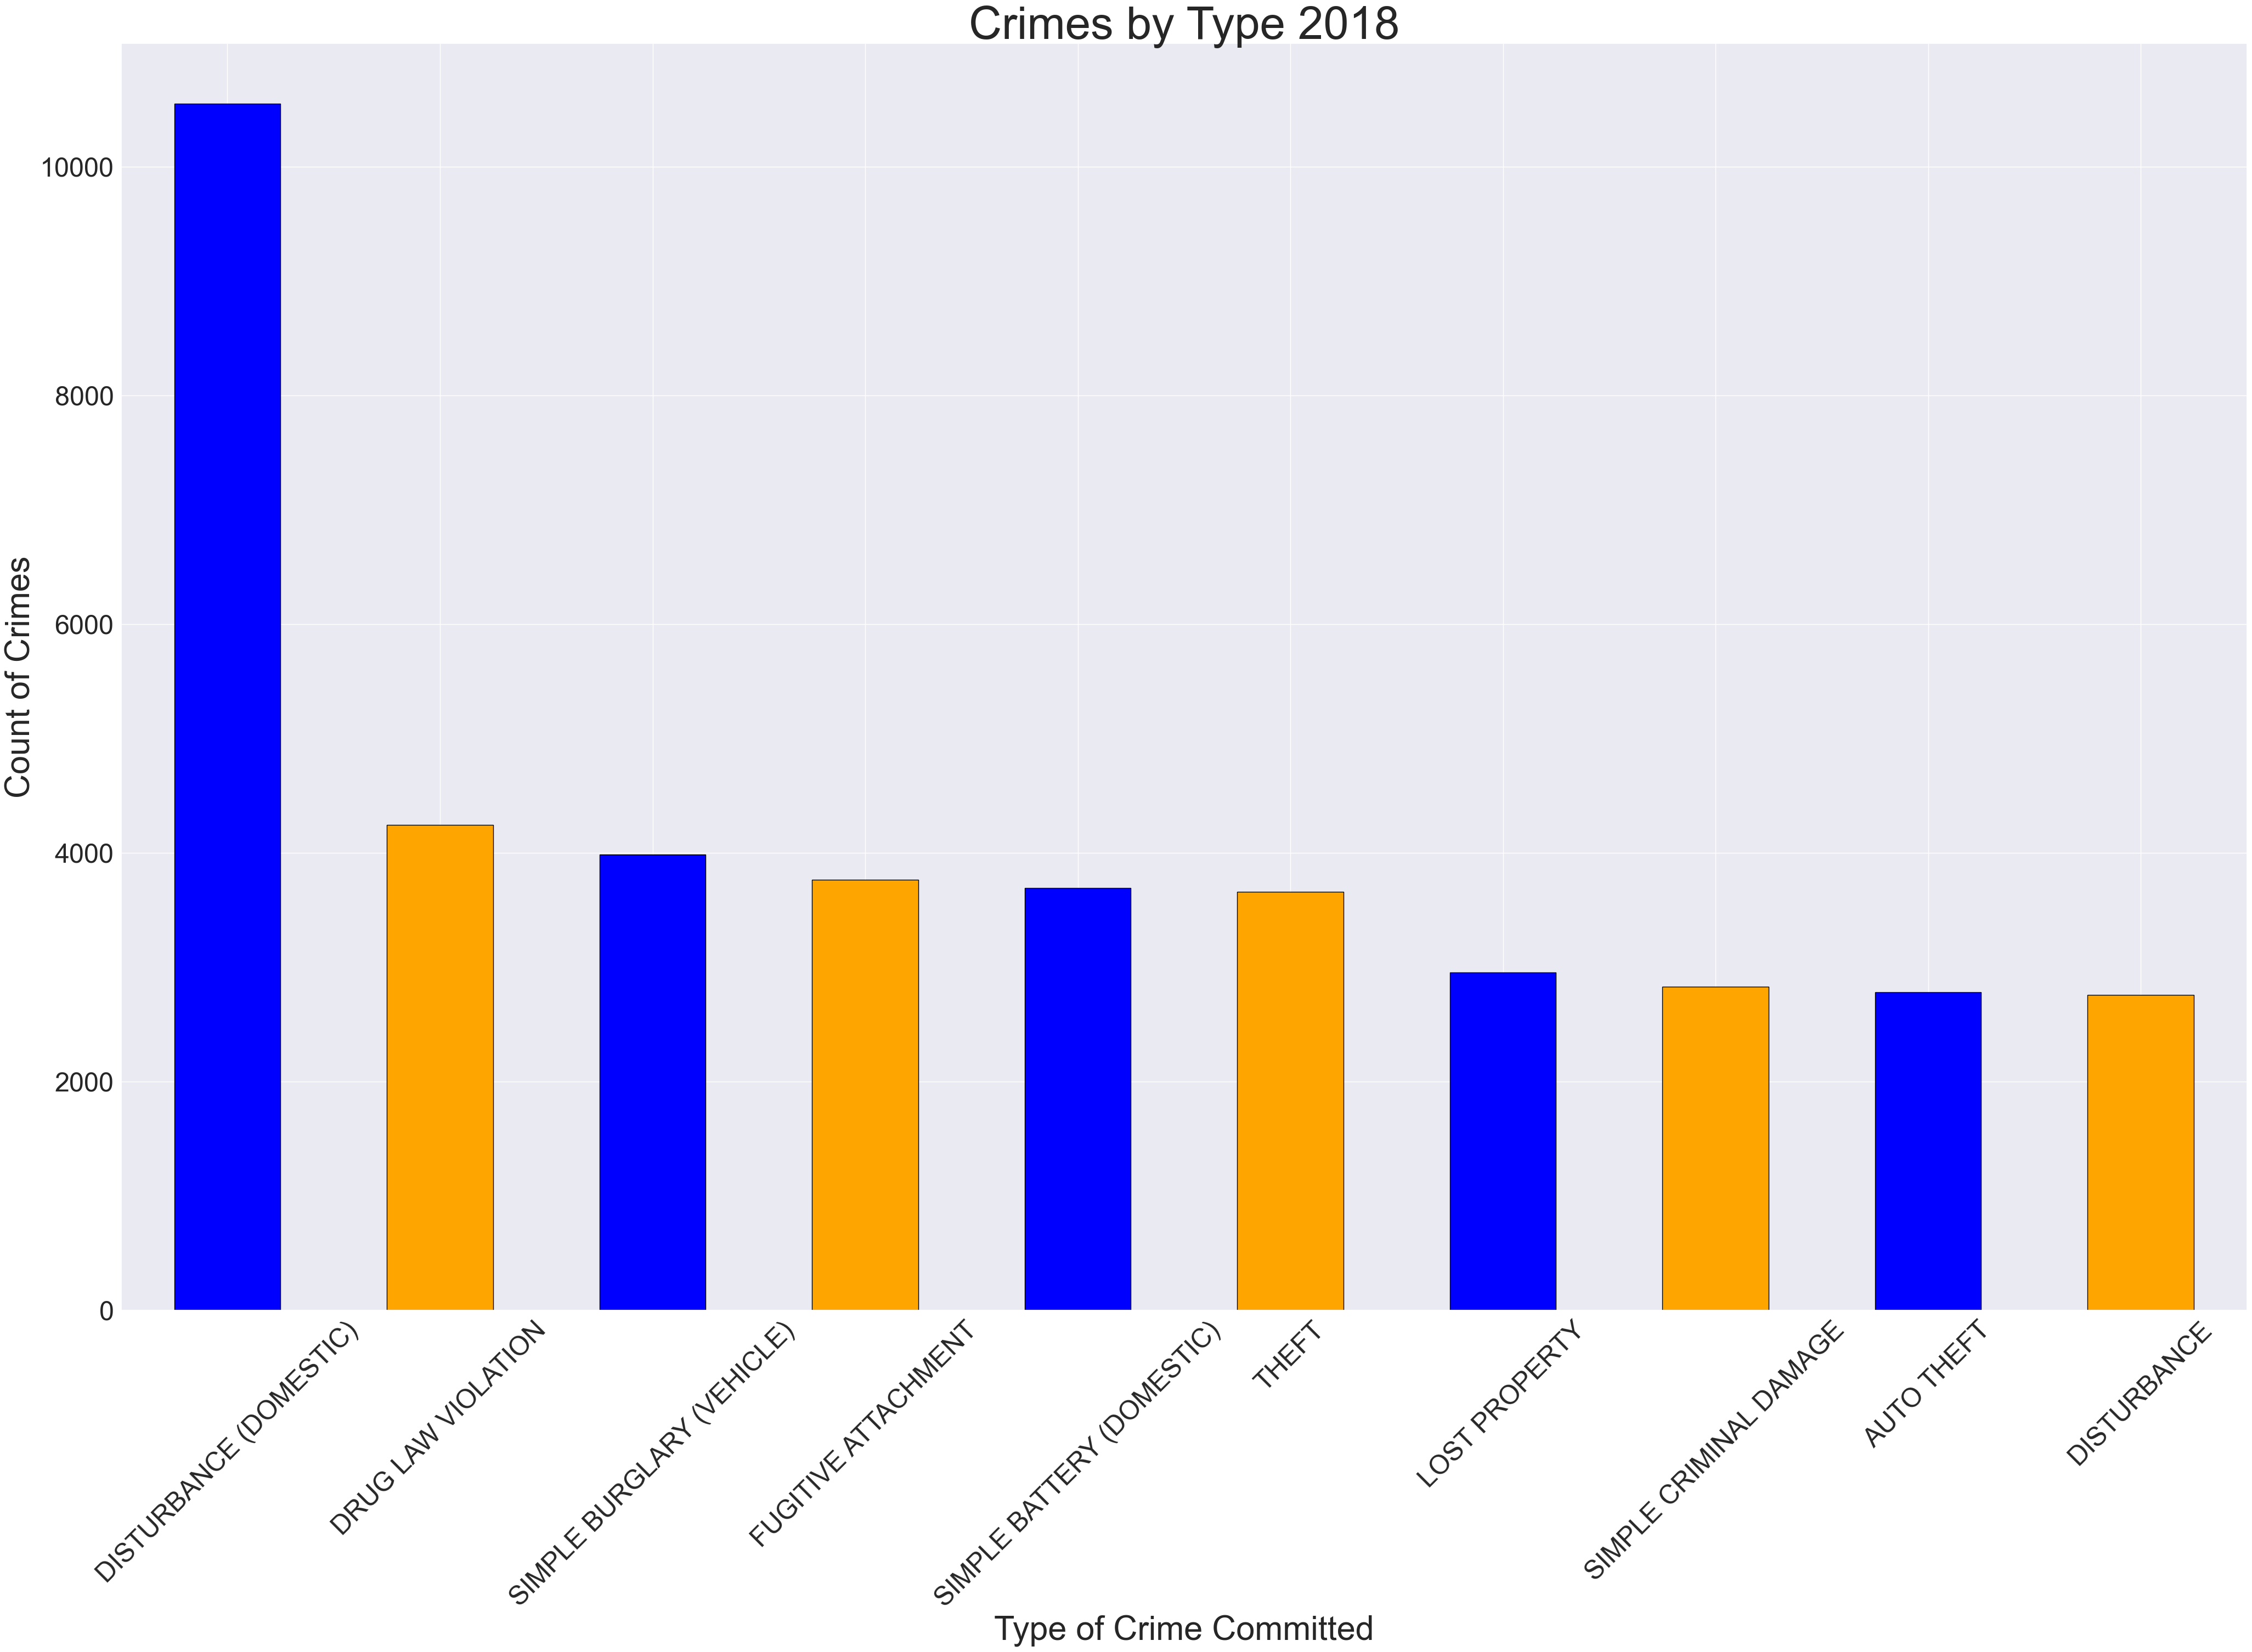

In [283]:
# Create a bar graph representing Signal_Description top ten with Counts
top_10_crimes_18.plot(kind='bar', edgecolor='black', rot=45, fontsize=35, color=["blue","orange"])
sns.set(style = 'darkgrid')
#add axis labels
plt.title("Crimes by Type 2018", fontsize=60)
plt.xlabel('Type of Crime Committed', fontsize=44)
plt.ylabel('Count of Crimes', fontsize=44)
plt.gcf().set_size_inches(50,30)
# Save the figure
plt.savefig("output_data/2018_crime_type.png")

In [284]:
reduced_crime_df.groupby("Signal_Description").count()

,Item_Number,Year,District,Signal_Type,Occurred_Date_Time,Offender_Gender,Victim_Fatal_Status
Signal_Description,,,,,,,
ABANDONED VEHICLE,16,16,16,16,16,0,16
AGGRAVATED ARSON,4,4,4,4,4,4,4
AGGRAVATED ASSAULT,481,481,481,481,481,406,481
AGGRAVATED ASSAULT (DOMESTIC),279,279,279,279,279,234,279
AGGRAVATED BATTERY,118,118,118,118,118,98,118
...,...,...,...,...,...,...,...
UNCLASSIFIED DEATH,176,176,176,176,176,1,176
UNDERAGE DRINKING,1,1,1,1,1,1,1
VIDEO VOYEURISM,67,67,67,67,67,14,67


In [285]:
district_crimes_18 = (reduced_crime_df["District"].value_counts())[:10]
district_crimes_18

7    11542
8     9474
5     8502
6     7949
3     7458
4     6666
2     6604
1     6208
Name: District, dtype: int64

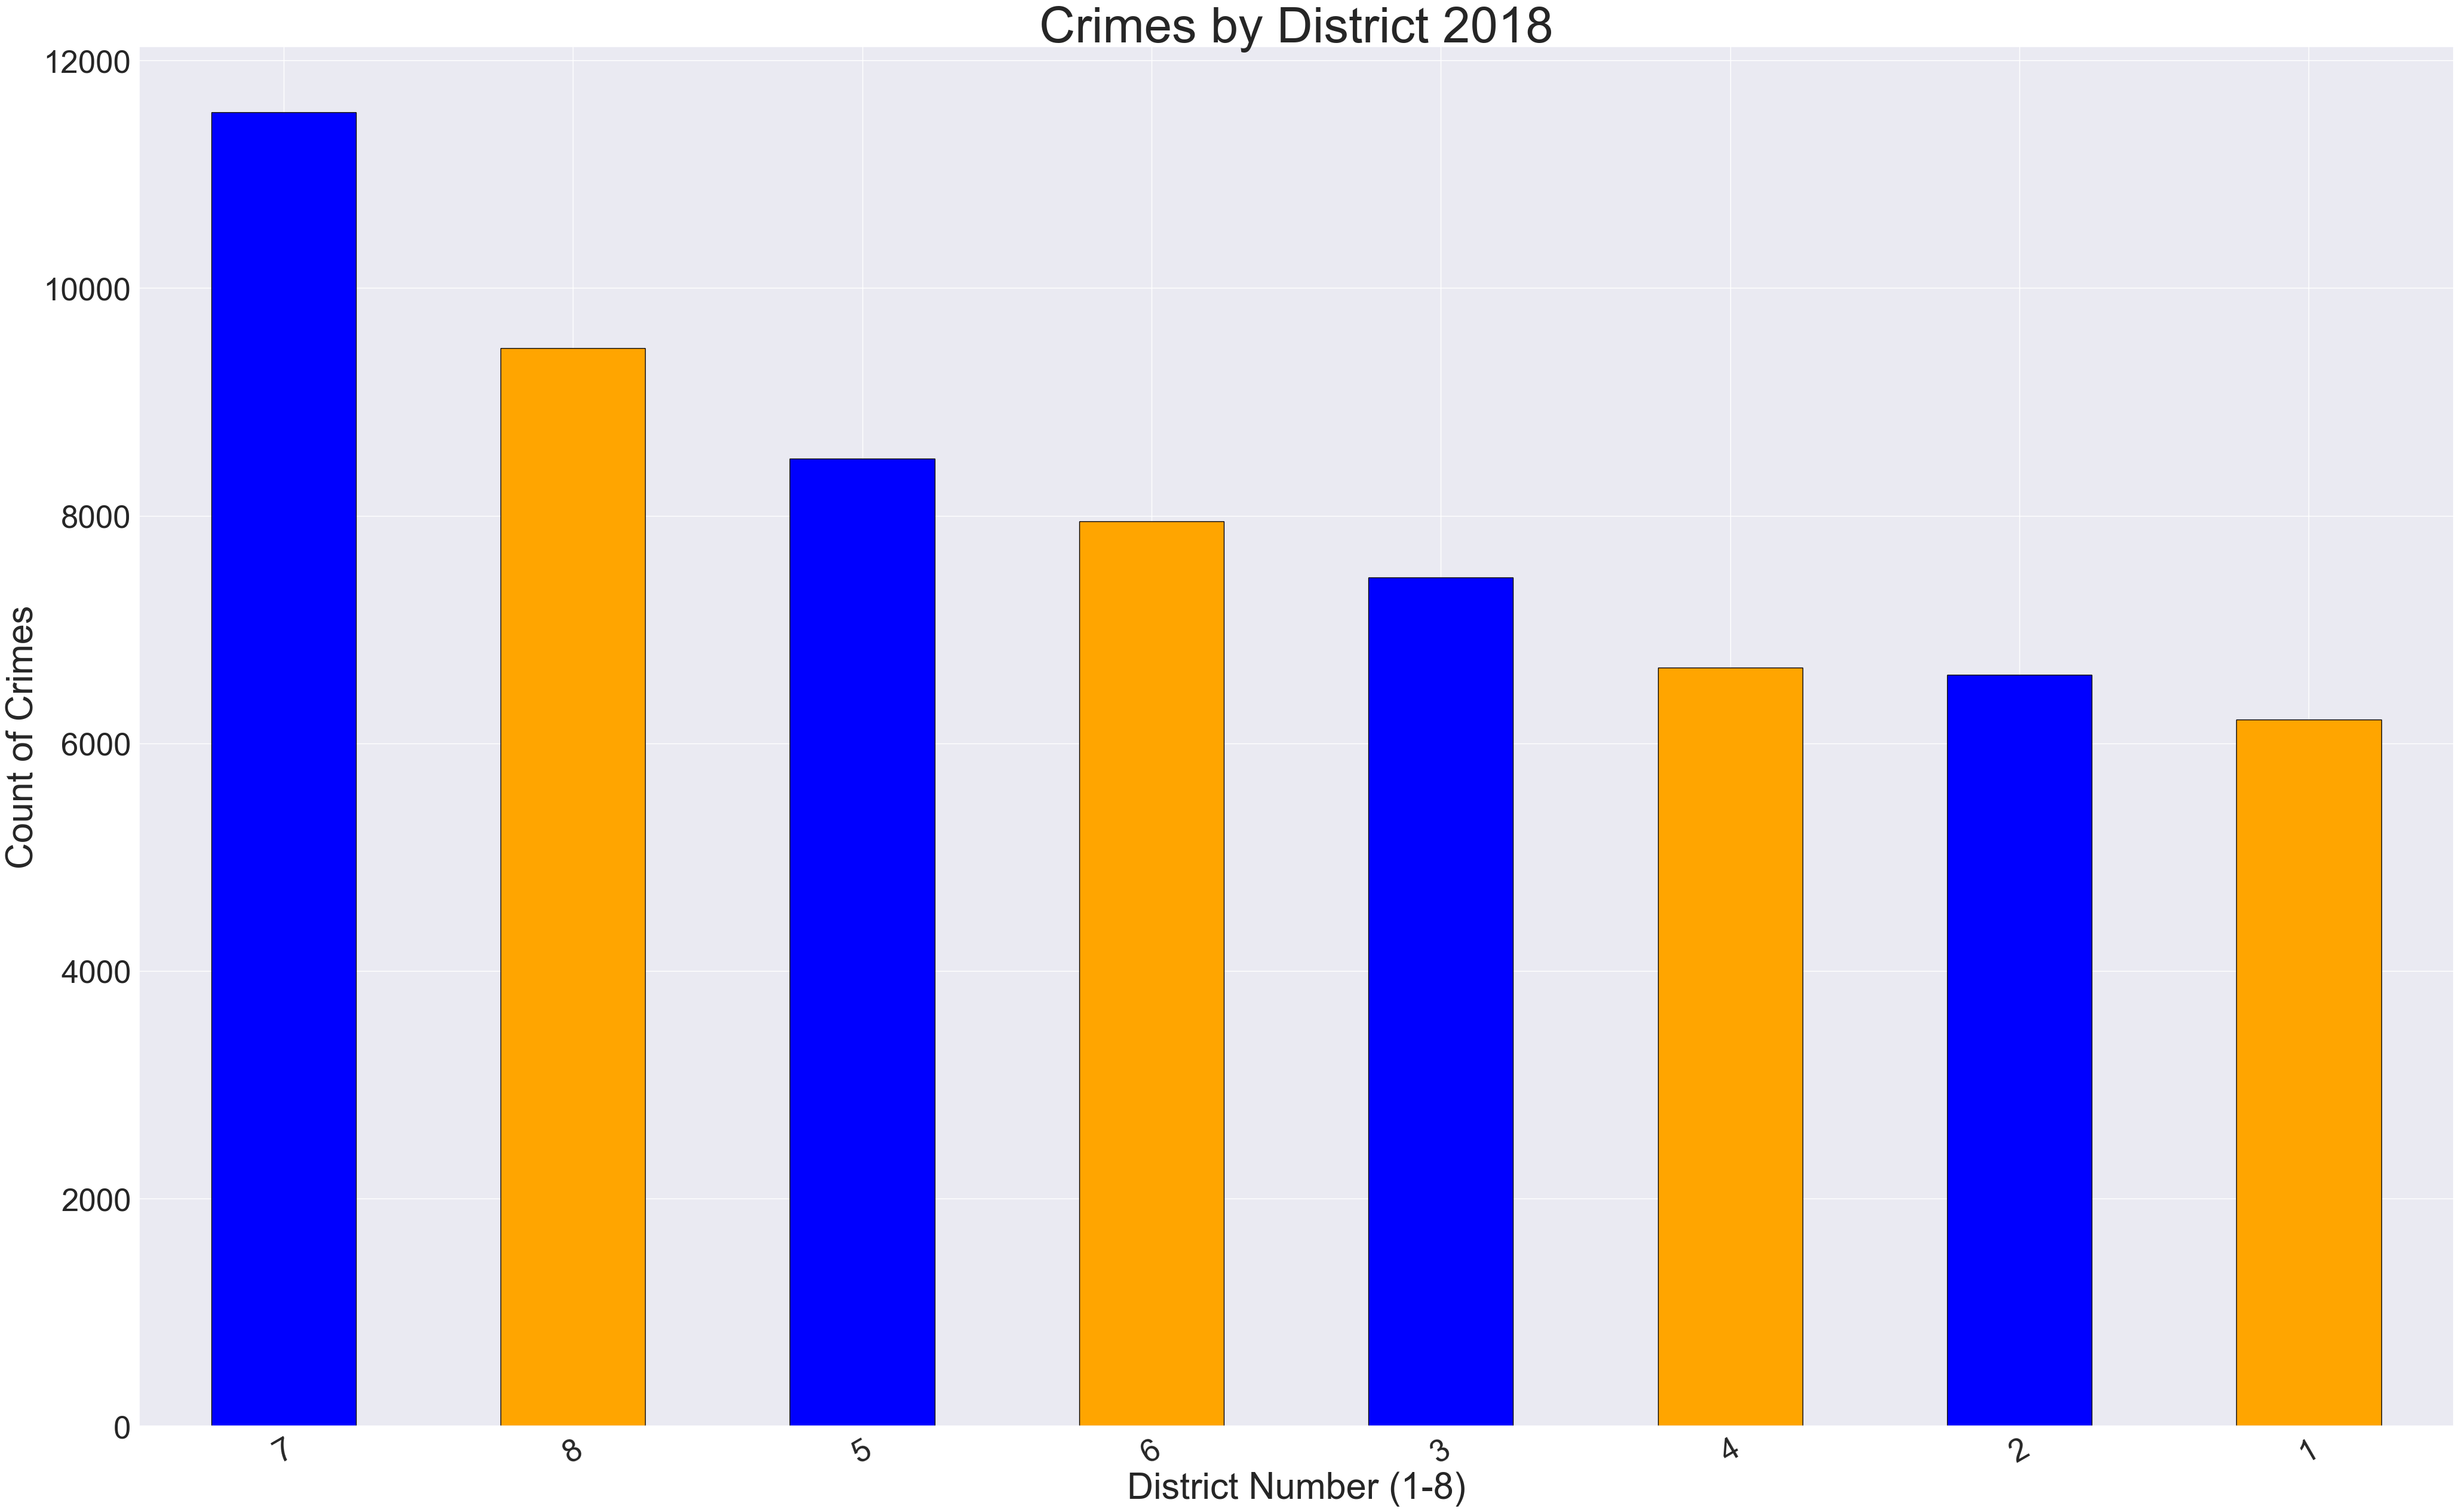

In [286]:
# Create a bar graph representing Signal_Description top ten with Counts
district_crimes_18.plot(kind='bar', edgecolor='black', rot=30, fontsize=38, color=["blue","orange"])
sns.set(style = 'darkgrid')

#add axis labels
plt.title("Crimes by District 2018", fontsize=60)
plt.xlabel('District Number (1-8)', fontsize=44)
plt.ylabel('Count of Crimes', fontsize=44)
plt.gcf().set_size_inches(50,30)
# Save the figure
plt.savefig("output_data/2018_district.png")

In [287]:
#crime_month = (reduced_crime_df["Occurred_Date_Time"].value_counts())[:10]
#crime_month

In [288]:
#fatality = reduced_crime_df["Victim_Fatal_Status"].value_counts()
#fatality

In [289]:
#reduced_crime_df["Offender_Gender"].value_counts().plot.pie(labels=["Male", "Female"], autopct="%.2f")
#plt.title("2018 Crime by Gender", fontsize=20)
# Save the figure
#plt.savefig("output_data/2018_gender.png")

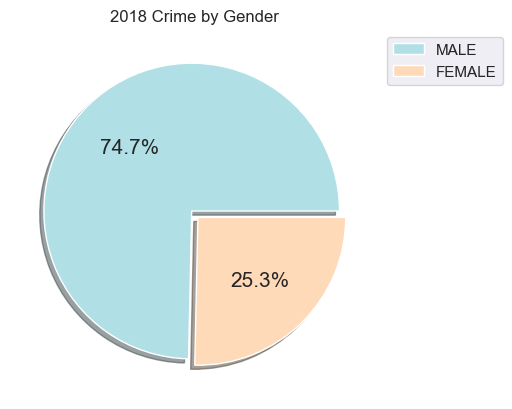

In [290]:
colors = ["#B0E0E6","#FFDAB9", "#B0E0E6","#FFDAB9"]
data = reduced_crime_df["Offender_Gender"].value_counts()
ax = data.plot(kind="pie", autopct='%1.1f%%', shadow=True, explode=[0.03, 0.03], colors=colors, legend=True, title="2018 Crime by Gender", fontsize=15, ylabel='', labeldistance=None)
ax.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.savefig("output_data/2018_gender.png")
plt.show()

In [266]:
#reduced_crime_df.groupby("District")["Signal_Description"].count().sort_values(ascending=False)
#reduced_crime_df.groupby("Signal_Description")["District"].count().sort_values(ascending=True)
#reduced_crime_df.value_counts()